#### Pandas 빠르게 훑어보기!!!

Pandas : 열(column) 중심 데이터 분석 API, 입력 데이터를 분석하고 처리하는데 효과적이고, 여러 Machine Learning Library (Scikit-learn, tensorflow)에서 Pandas 데이터 구조를 입력으로 지원합니다. [공식 문서](https://pandas.pydata.org/)

Pandas의 기본 데이터 구조

* #### Series : 레이블 될 수 있는 1차원 데이터 입니다. 관계형 데이터베이스 테이블의 하나의 열과 비슷합니다.

In [49]:
import pandas as pd

city_names = pd.Series(['seoul', 'busan', 'incheon']) # 도시 이름 열
population = pd.Series(['10_000_000', '3_400_000', '2_880_000']) # 인구 열

* #### DataFrame : Series와 Series의 이름이 모인 2차원 데이터 입니다. 관계형 데이터베이스 테이블과 비슷합니다.

In [50]:
pd.DataFrame({"city_names": city_names, "population": population})

,city_names,population
0,seoul,10_000_000
1,busan,3_400_000
2,incheon,2_880_000


데이터 분석 시, 특정 데이터 소스(csv, json, html...) 에서 대량의 데이터를 한꺼번에 가져와서 DataFrame 구조로 로드 합니다.

In [51]:
csv_data_src = 'https://storage.googleapis.com/mledu-datasets/california_housing_train.csv'
california_housing_dataframe = pd.read_csv(csv_data_src, sep=',')

가져온 DataFrame 에는 유용한 함수가 많습니다.

#####  처음 몇 개만 보기

In [52]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


##### 마지막 몇 개만 보기 

In [53]:
california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


##### 데이터의 통계 보기

In [54]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### 히스토그램 그리기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b57cef0>]],
      dtype=object)

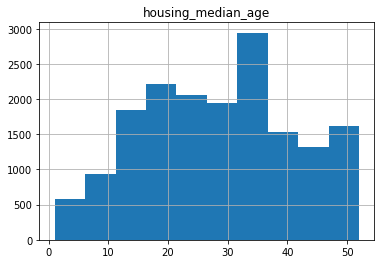

In [55]:
california_housing_dataframe.hist('housing_median_age')

##### 파이썬의 기본 문법을 사용해서 DataFrame 의 데이터에 접근할 수 있습니다.

In [56]:
california_housing_dataframe['longitude'][0]

-114.31

In [57]:
california_housing_dataframe['housing_median_age'][0:3]

0    15.0
1    19.0
2    17.0
Name: housing_median_age, dtype: float64

##### 데이터 조작해보기
###### series 추가

In [58]:
population = california_housing_dataframe['population']

# 인구가 1000 명 이상이면 true, 아니면 false 인 새로운 series 만들기
is_over_1000_population = population.apply(lambda val : val > 1000)

# 새롭게 만든 series 를 기존 dataframe 에 추가하기
california_housing_dataframe['is_over_1000_population'] = is_over_1000_population
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,is_over_1000_population
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,True
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,True
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,False
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,False
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,False
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,False
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,True
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,False
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,True
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,False


###### series 삭제

In [59]:
california_housing_dataframe.drop(['is_over_1000_population'], axis=1, inplace = True)
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0
